<font color='DarkOrange' face='Ubuntu Mono' size='+4'><center><b>f-string: 問君能有幾多型？</b></center></font>

<div style="font-family:Inconsolata; font-size:112%;">

## <font color='SteelBlue'><b>如何稱呼一名使用及喜愛Python的programmer？</b></font>

<div style="font-family:Inconsolata; font-size:130%;">
請投票。

    (1) Pythoner  
    (2) Pythonist  
    (3) Pythonista  
    (4) Pythoneer  
    (5) Pythonian

<div style="font-family:Inconsolata; font-size:112%;">

## <font color='SteelBlue'><b>When and why f-string?</b></font>
* 從cPython 3.6版起啟用。
* [PEP 498 – Literal String Interpolation](https://peps.python.org/pep-0498/)
* 比之前的str.format()更簡潔直觀。

In [39]:
id = 641352
name = "Alex"
print("{}      {}".format(id, name))  # 3.6版之前的str.format()。
print(f"{id}      {name}")  # 3.6版起的f-string。

641352      Alex
641352      Alex


<div style="font-family:Inconsolata; font-size:500%;">
<header>
<br><br><br><br><br>
</header>

<div style="font-family:Inconsolata; font-size:112%;">

## <font color='SteelBlue'><b>筆者通常會再加些提示</b></font>

In [40]:
print(f"id: {id}      name: {name}")  # 加些提示更易讀。

id: 641352      name: Alex


<div style="font-family:Inconsolata; font-size:500%;">
<header>
<br><br><br><br><br>
</header>

<div style="font-family:Inconsolata; font-size:112%;">

## <font color='SteelBlue'><b>加提示是比較清楚，可是...</b></font>
* 以上的code：
    * `print(f"id: {id}      name: {name}")`
* id和name都重複了1次，前面的是定數(literal)，後面則是變數(variable)。
* 有沒可能做到<font color='tomato'><b>「有提示但不用寫2次」</b></font>？
* ...
* The Answer?

![](./assets/Allen%20Iverson--The%20Answer-1.jpg)
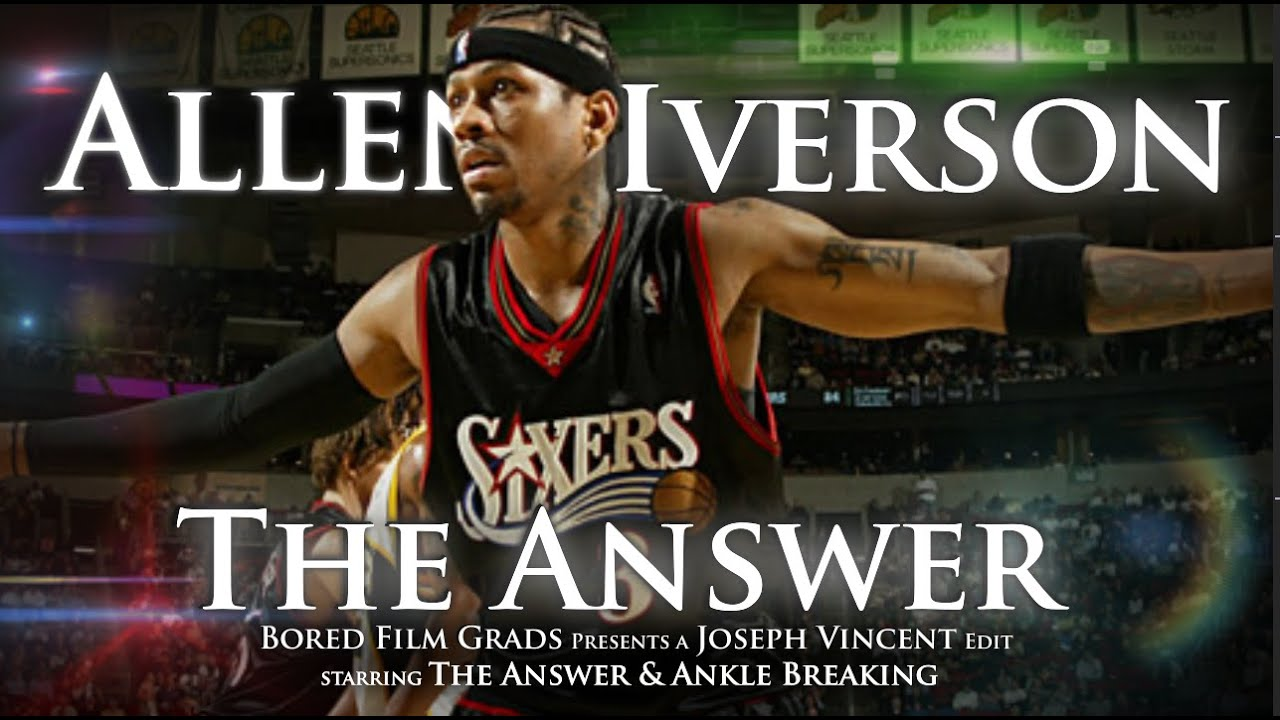

<div style="font-family:Inconsolata; font-size:500%;">
<header>
<br><br><br><br><br>
</header>

<div style="font-family:Inconsolata; font-size:112%;">

## <font color='SteelBlue'><b>The Answer: 後綴帶'='的f-string</font>
* 語法：
    * <font size='+2'>f'{name<font color='tomato'><b>=</b></font>}'</font>
* 好處：
    * self-documenting
    * 較易觀察型別，容易區分是str或者int / float。
* 建議：簡單實用，請多捧場。

In [ ]:
language = "Python"
version1 = "3.12"
version2 = 3.12
print(f"language={language}    version1={version1}    version2={version2}")
print(f"{language=}    {version1=}    {version2=}")

<div style="font-family:Inconsolata; font-size:500%;">
<header>
<br><br><br><br><br>
</header>

<div style="font-family:Inconsolata; font-size:112%;">

## <font color='SteelBlue'><b>另一種顯示型別的方式：!r</font>
* 其實是standard library中的`repr()`函數的syntactic sugar(語法甜頭 / 語法糖)。

In [ ]:
person = {"id": 6, "name": "Alex"}
weight = 3.9
version = "3.9"

print(f"0: {person}\t\t{weight}\t\t{version}")
print("----------------")
print(f"1: {person!r}\t\t{weight!r}\t\t{version!r}")
print(f"2: {repr(person)}\t\t{repr(weight)}\t\t{repr(version)}")  # 效果和上行相同。
print("----------------")
print(f"3: {person=}\t{weight=}\t{version=}")
print(f"4: {person=!r}\t{weight=!r}\t{version=!r}")  # 效果和上行相同。

<div style="font-family:Inconsolata; font-size:500%;">
<header>
<br><br><br><br><br>
</header>

<div style="font-family:Inconsolata; font-size:112%;">

## <font color='SteelBlue'><b>expression(運算式) vs statement(指令)</font>
* 粗略區分：
    * 有「值」的大概就是expression。
        * expression最簡單的型態就是單一變數，例如`name = 'Alex'`</font>中的<font color='tomato'>name</font>和<font color='tomato'>Alex</font>都是expression。
        * expression也可以由多個變數加上一些運算子組合而成的較為複雜的區塊。例如：<font color='tomato'>3 + 4*5</font>。
    * 有「賦值」動作但本身沒有值的是statement。例如：
        * <font color='tomato'>name = 'Alex'</font>
        * <font color='tomato'>price *= 1.2</font>
        * `if id == 3:`, `for id in ids:`, `while True:`等也是statement，不過比較和目前的討論無關。略。
* f-string的`'{}'`之內，除了單一變數外，還<font color='yellow'>可以放比較複雜的expression，但不能是statement</font>。

In [ ]:
from math import pi

radius = 15.38
# 求圓面積。注意{}內的expression是較為複雜的結構，非單一變數。
print(f"{(pi * radius**2)=}")

In [ ]:
# wrong syntax
print(f"{radius = 15.38=}")  # 圓面積

<div style="font-family:Inconsolata; font-size:500%;">
<header>
<br><br><br><br><br>
</header>

<div style="font-family:Inconsolata; font-size:112%;">

## <font color='SteelBlue'><b>和海象共舞</font>
* cPython 3.8起推出海象運算子(walrus operator)，即 <font color='gold' size='+3'>:=</font>。
* 透過海象運算子組成的結構，正式名稱是<font color='tomato'>Assignment Expression</font>(賦值運算式)，所以是expression運算式，不是statement指令。
* 因為是expression，自然可以和f-string搭配使用。
* 注意：在f-string使用walrus operator，須加小括號。

In [ ]:
print(f"{(r1 := 27.49)}")  # 這樣有點多餘，不建議，直接用statement賦值更直觀。
print(f"{(pi * r1**2)=}")  # 圓面積。複雜的expression也可以使用'='，但較不好看。
print(f"area: {pi * r1**2}")  # 圓面積。這樣的輸出比較易讀。
print("----------------")
print(f"area: {pi * (r2 := 27.49)**2}")  # 圓面積，好處是一行OK。

<div style="font-family:Inconsolata; font-size:500%;">
<header>
<br><br><br><br><br>
</header>

<div style="font-family:Inconsolata; font-size:112%;">

## <font color='SteelBlue'><b>大括號外的string literal(字串定數)如果也有大括號</b></font>
* 請用<font color='tomato'>'{{', '}}'</font>代替`'{'`, `'}'`。

In [ ]:
person = {"name": "Alex", "age": 45}

print(f"dict的語法是前後須用大括號{{}}括起來，例如： {person=}")

<div style="font-family:Inconsolata; font-size:112%;">

## <font color='SteelBlue'><b>Formatting(格式)</b></font>
* Python文字和數字的「格式」非常豐富，f-string基本上都可以使用。
* 上面說「基本上」，是由於筆者未確定是否全部的格式f-string都可以用。
* 所謂「格式」，是指改變、調整原來文字或數字的「樣貌」，例如左靠、右靠、居中、補零、小數點四捨五入(或「銀行家捨入法」)、......
* [Python String Formatting參考-1](https://www.programiz.com/python-programming/methods/string/format)
* [Python String formatting參考-2](https://www.w3schools.com/python/ref_string_format.asp)

### <font color='DarkSalmon' face='mononoki'><b>Formatting Types</b></font>
|<font color='CornflowerBlue'><center><b>format specifier</b></center></span>|<font color='CornflowerBlue'><center><b>效　果</b></center></span>|
|------|-------|
|<span style="color:Tomato; font-size: 150%; font-weight: 700;"></span><span style="color: Chartreuse; font-size: 150%; font-weight: 700;">{n}</span>|Aligns the result with default direction (within the available space)|
|<span style="color:Tomato; font-size: 150%; font-weight: 700;"><</span><span style="color: Chartreuse; font-size: 150%; font-weight: 700;">{n}</span>|Left aligns the result (within the available space)|
|<span style="color:Tomato; font-size: 150%; font-weight: 700;">></span><span style="color: Chartreuse; font-size: 150%; font-weight: 700;">{n}</span>|Right aligns the result (within the available space)|
|<span style="color:Tomato; font-size: 150%; font-weight: 700;">^</span><span style="color: Chartreuse; font-size: 150%; font-weight: 700;">{n}</span>|Center aligns the result (within the available space)|
|<span style="color:Tomato; font-size: 150%; font-weight: 700;">=</span><span style="color: Chartreuse; font-size: 150%; font-weight: 700;">{n}</span>|Places the sign to the left most position|
|<span style="color:Tomato; font-size: 150%; font-weight: 700;">+</span><span style="color: Chartreuse; font-size: 150%; font-weight: 700;">{n}</span>|Use a plus sign to indicate if the result is positive or negative|
|<span style="color:Tomato; font-size: 150%; font-weight: 700;">-</span><span style="color: Chartreuse; font-size: 150%; font-weight: 700;">{n}</span>|Use a minus sign for negative values only|
|<span style="color:Tomato; font-size: 150%; font-weight: 700;"> </span><span style="color: Chartreuse; font-size: 150%; font-weight: 700;">{n}</span>|Use a space to insert an extra space before positive numbers (and a minus sign before negative numbers)|
|<font color='Tomato' size='+3'><b></b></font><span style="color: Chartreuse; font-size: 150%; font-weight: 700;">{n}</span><font color='Tomato' size='+3'><b>,</b></font>|Use a comma as a thousand separator|
|<font color='Tomato' size='+3'><b></b></font><span style="color: Chartreuse; font-size: 150%; font-weight: 700;">{n}</span><font color='Tomato' size='+3'><b>_</b></font>|Use a underscore as a thousand separator|
|<font color='Tomato' size='+3'><b>b  |Binary format|
|<font color='Tomato' size='+3'><b>#b |Binary format, with prefix `0b`|
|<font color='Tomato' size='+3'><b>c  |Converts the value into the corresponding unicode character|
|<font color='Tomato' size='+3'><b>d  |Decimal format|
|<font color='Tomato' size='+3'><b>e  |Scientific format, with a lower case e|
|<font color='Tomato' size='+3'><b>E  |Scientific format, with an upper case E|
|<font color='Tomato' size='+3'><b></font><font color='LightSteelBlue' size='+2'>{m.n}<font color='Tomato' size='+3'><b>f</b> |Fix point number format|
|<font color='Tomato' size='+3'><b>F  |Fix point number format, in uppercase format (show inf and nan as INF and NAN)|
|<font color='Tomato' size='+3'><b>g  |General format|
|<font color='Tomato' size='+3'><b>G  |General format (using a upper case E for scientific notations)|
|<font color='Tomato' size='+3'><b>o  |Octal format|
|<font color='Tomato' size='+3'><b>#o |Octal format, with prefix `0o`|
|<font color='Tomato' size='+3'><b>x  |Hex format, lower case|
|<font color='Tomato' size='+3'><b>X  |Hex format, upper case|
|<font color='Tomato' size='+3'><b>#x |Hex format, lower case, with prefix `0x`|
|<font color='Tomato' size='+3'><b>#x |Hex format, upper case, with prefix `0X`|
|<font color='Tomato' size='+3'><b>n  |Number format|
|<font color='Tomato' size='+3'><b>%  |Percentage format|
|<font color='Tomato'><b>%Y-%m-%d %H:%M:%S|日期時間格式|

|Format Specifier|Effect|
|------|-------|
|<{n}|Left aligns the result (within the available space)|
|>{n}|Right aligns the result (within the available space)|
|^{n}|Center aligns the result (within the available space)|
|={n}|Places the sign to the left most position|
|+{n}|Use a plus sign to indicate if the result is positive or negative|
|-{n}|Use a minus sign for negative values only|
| {n}|Use a space to insert an extra space before positive numbers (and a minus sign before negative numbers)|
|{n},|Use a comma as a thousand separator|
|{n}_|Use a underscore as a thousand separator|
|b  |Binary format|
|#b|Binary format, with prefix `0b`|
|c  |Converts the value into the corresponding unicode character|
|d  |Decimal format|
|e  |Scientific format, with a lower case e|
|E  |Scientific format, with an upper case E|
|{m.n}f|Fix point number format|
|.{n}f|format a floating point number to {n} decimal places|
|||
|F  |Fix point number format, in uppercase format (show inf and nan as INF and NAN)|
|g  |General format|
|G  |General format (using a upper case E for scientific notations)|
|o  |Octal format|
|#o |Octal format, with prefix `0o`|
|x  |Hex format, lower case|
|X  |Hex format, upper case|
|#x |Hex format, lower case, with prefix `0x`|
|#x |Hex format, upper case, with prefix `0X`|
|n  |Number format|
|%  |Percentage format|
|%Y-%m-%d %H:%M:%S|datetime format|


In [108]:
# format a floating point number to 2 decimal places.

# Zero padding: {:05d} would format an integer, padding it with zeros to make a 5-digit number.
# String truncating: {:.5} would truncate a string to its first 5 characters.
# Hex, octal, and binary can also use the # option to include the 0x, 0o, 
# or 0b prefix respectively, like {:0#x}.
print(f"  {'1234567890'*5}")
x = 13
print(f'a:{x:6}')        # 無指定padding character及靠邊方向。
print(f'b:{x:6d}')
print(f'c:{x:#6}')
print(f'd:{x:#6d}')
print()
print(f'e:{x:^6}')       # 無指定padding character，指定靠邊方向。
print(f'f:{x:^6d}')
print(f'g:{x:<#6}')
print(f'h:{x:>#6d}')
print()
# print(f'x:{x:.>6}')       # 指定padding character，不指定靠邊方向。
# print(f'f:{x:.6d}')
# print(f'g:{x:.#6}')
# print(f'h:{x:.#6d}')
# print()
print(f'i:{x:.^6}')        # 指定padding character，指定居中。
print(f'j:{x:.^6d}')
print(f'k:{x:.<#6}')
print(f'l:{x:.>#6d}')
print()

print(f'm:{x:0^6}')
print(f'n:{x:0^6d}')
print(f'o:{x:0<#6}')
print(f'p:{x:0>#6d}')

# s = '0123456789'
# f'{s:.0}'
# s[1:0]

# f'{x:#b}'
# f'{x:6}'
# f'{x:.<6}'
# f'{x:#06}'
# f'{x:06}'
# f'{x:0#x}'
# f"{x:#X}"
# f"{x:#x}"
# {:0#x}


  12345678901234567890123456789012345678901234567890
a:    13
b:    13
c:    13
d:    13

e:  13  
f:  13  
g:13    
h:    13

x:....13
i:..13..
j:..13..
k:13....
l:....13

m:001300
n:001300
o:130000
p:000013


In [100]:
# string alignments(這幾個對齊符號通常用在字串):
print('1234567890' * 4)
for i in range(1)
name = 'Alex'
print(f'|{name:<10}|')    # 靠左
print(f'|{name:>10}|')    # 靠右
print(f'|{name:^10}|')    # 居中
print(f'|{name=:^10}|')
print(f'|{name=:>10}|')
print('1234567890' * 4)

1234567890123456789012345678901234567890
|Alex      |
|      Alex|
|   Alex   |
|name=   Alex   |
|name=      Alex|
1234567890123456789012345678901234567890


In [105]:
# Use "=" to place the minus sign at the left most position.
print('1234567890' * 4)
balance = -50000        # 正數沒啥效果，所以只展示負數。
print(f'{balance:>10}')
print(f'{balance:=10}')
print('1234567890' * 4)

1234567890123456789012345678901234567890
    -50000
-    50000
1234567890123456789012345678901234567890


In [152]:
# Use a plus/minus sign to indicate if the result is positive or negative.
print('1234567890' * 4)
balance = 50000
print(f'{balance:+10}')
balance = -50000
print(f'{balance:+10}')
print('1234567890' * 4)

1234567890123456789012345678901234567890
        +0
    -50000
1234567890123456789012345678901234567890


In [110]:
# Use a minus sign for negative values only.
print('1234567890' * 4)
balance = 50000
print(f'{balance:-10}')
print(f'{balance:10}')
balance = -5000
print(f'{balance:-10}')
print(f'{balance:10}')
print('1234567890' * 4)

1234567890123456789012345678901234567890
     50000
     50000
     -5000
     -5000
1234567890123456789012345678901234567890


In [122]:
# Use " " (a space) to insert a space before positive numbers
# and a minus sign before negative numbers.
print('1234567890' * 4)
balance = 50000
print(f'{balance: 10}')
print(f'{balance: }')
balance = -5000
print(f'{balance: 10}')
print(f'{balance: }')
print('1234567890' * 4)

1234567890123456789012345678901234567890
     50000
 50000
     -5000
-5000
1234567890123456789012345678901234567890


In [123]:
# Use a space to insert an extra space before
# positive numbers (and a minus sign before negative numbers).
print('1234567890' * 4)
balance = 50000
print(f'{balance: }')
print(f'{balance: 10}')   # 加上長度，空格就沒甚麼意義了。
print(f'{balance:10}')    # 效果和上行相同。
balance = -50000
print(f'{balance: }')
print(f'{balance: 10}')
print(f'{balance:10}')
print('1234567890' * 4)

1234567890123456789012345678901234567890
 50000
     50000
     50000
-50000
    -50000
    -50000
1234567890123456789012345678901234567890


In [22]:
# Use a comma as a thousand separator.千位點
print('1234567890' * 4)
balance = 50000
print(f'{balance=:10,}')  # 注意：逗點要放在長度的「後面」。
print(f'{balance=:,}')
balance = -5000
print(f'{balance=:10,}')
print(f'{balance=:,}')
print('1234567890' * 4)

1234567890123456789012345678901234567890
balance=    50,000
balance=50,000
balance=    -5,000
balance=-5,000
1234567890123456789012345678901234567890


In [20]:
# Use a underscore as a thousand separator.底線千位點
print('1234567890' * 4)
balance = 50000
print(f'{balance=:10_}')  # 注意：底線要放在長度的「後面」。
print(f'{balance=:_}')
balance = -5000
print(f'{balance=:10_}')
print(f'{balance=:_}')
print('1234567890' * 4)

1234567890123456789012345678901234567890
balance=    50_000
balance=50_000
balance=    -5_000
balance=-5_000
1234567890123456789012345678901234567890


In [19]:
# 數字補0
print('1234567890' * 4)
id = 100
print(f'{id=}')       # 100
print(f'{id=:5}')     #   100
print(f'{id=:05}')    # 00100
print('1234567890' * 4)

1234567890123456789012345678901234567890
id=100
id=  100
id=00100
1234567890123456789012345678901234567890


In [18]:
# Use "f" to convert a number into a fixed point number, default with 6 decimals,
# but use a period followed by a number to specify the number of decimals.
print('1234567890' * 4)
# pi = 3.14159265358979323846264338327950288419716939937510
pi = 3.14
print(f'{pi=:.4f}')    # 3.1400
print(f'{pi=:8.4f}')   # 總長度8，小數點4位。  #   3.1400
print(f'{pi=:08.4f}')  # 總長度8，小數點4位，整數部分補0。  # 003.1400
print('1234567890' * 4)

1234567890123456789012345678901234567890
pi=3.1400
pi=  3.1400
pi=003.1400
1234567890123456789012345678901234567890


In [17]:
print('1234567890' * 4)
literacy_rate = 0.3576  # 識字率
print(f'{literacy_rate=:.0%}')   # round到整數。  36%
print(f'{literacy_rate=:.1%}')   # round到小數點後第1位。   35.8%
print(f'{literacy_rate=:.4%}')   # round到小數點後第2位。   35.7600%
print('1234567890' * 4)

1234567890123456789012345678901234567890
literacy_rate=36%
literacy_rate=35.8%
literacy_rate=35.7600%
1234567890123456789012345678901234567890


In [27]:
# 以上的格式不是像Excel那樣「僅供顯示」，而是真的改變了內容。
print('1234567890' * 4)
name = 'Alex'
name = f'{name:^10}'  # 居中
name              
print(name[3])    
print(len(name))  
print()
pi = 3.1415926
print(f'{pi=:.4f}')  

radius = 168.5037
circumference = 2.0 * pi * radius   # 圓周
print(f'{circumference:=,.6f}')  # 注意：逗點要放在浮點數長度的「前面」。
print('1234567890' * 4)

1234567890123456789012345678901234567890
A
10

pi=3.1416
1,058.739954
1234567890123456789012345678901234567890


In [37]:
from datetime import datetime
now = datetime.now()
print(f'{now = }')   # 無格式
print(f'{now = :%Y.%m.%d %H:%M:%S}')
print(f'{now = :%Y-%m-%d %H:%M:%S}')
print(f'{now = :%Y/%m/%d %I:%M:%S %p}')
print(f'{now = :%I:%M:%S %p, %d/%m/%Y}')
print(f'{now = :%A, %B %d %Y %I:%M%P}')

now = datetime.datetime(2022, 6, 14, 2, 11, 8, 287791)
now = 2022.06.14 02:11:08
now = 2022-06-14 02:11:08
now = 2022/06/14 02:11:08 AM
now = 02:11:08 AM, 14/06/2022
now = Tuesday, June 14 2022 02:11am


In [173]:
# 下面這行one-liner冗長累贅，強烈建議「不要」這樣玩。試寫出來僅為：
#   1) 練功。
#   2) 也許可套用於其他情境。
#   3) 說不定求職面試時會考。
print(((ruler := ''.join([str(i) for i in range(10)]))[1:] + ruler[0]) * 4)
print('1234567890' * 4)

1234567890123456789012345678901234567890
1234567890123456789012345678901234567890
